# アンサンブル学習とは
アンサンブル学習とは、複数の学習器を用いて学習を行う手法です。

複数の学習器で学習することによって、精度が高くなると一般的に言われています。

バギング、ブースティング、ランダムフォレストがその例です。

# ランダムフォレストとは
ランダムフォレストとは決定木を拡張したもので、分類、回帰、クラスタリングに用いることが可能な機械学習のアルゴリズムのひとつです。

ランダムフォレストは、複数の決定木でアンサンブル学習を行う手法になります。

ランダムフォレストの特徴として、

1. 一般的な決定木より性能のよい識別・予測が可能
2. チューニング対象となるハイパーパラメータが少ない

などの特徴があります。

# ランダムフォレストの実装例

実装例として、決定木のときに使用したタイタニックのデータを使用します。

決定木の章で作成したプログラムに、以下のプログラムを書いてみましょう。

RandomForestClassifierを使用します。

['row.names' 'pclass' 'survived' 'name' 'age' 'embarked' 'home.dest' 'room'
 'ticket' 'boat' 'sex']
['1' '1st' '1' 'Allen, Miss Elisabeth Walton' '29.0000' 'Southampton'
 'St Louis, MO' 'B-5' '24160 L221' '2' 'female'] 1
['pclass' 'age' 'sex']
['1st' 'NA' 'female'] 1
Cateorical classes: ['female' 'male']
Integer classes: [0 1]
['pclass' 'age' 'sex']
['1st' '31.19418104265403' '0'] 1
Categorical classes: ['1st' '2nd' '3rd']
Integer classes: [[0]
 [1]
 [2]]
['age', 'sex', 'first class', 'second class', 'third class']
[ 29.   0.   1.   0.   0.] 1.0


C:\Users\masayoshi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy:0.822 

Classification report
             precision    recall  f1-score   support

        0.0       0.80      0.97      0.88       643
        1.0       0.90      0.55      0.68       341

avg / total       0.84      0.82      0.81       984
 

Confussion matrix
[[622  21]
 [154 187]] 

Accuracy:0.857 

Classification report
             precision    recall  f1-score   support

        0.0       0.84      0.97      0.90       643
        1.0       0.92      0.64      0.76       341

avg / total       0.87      0.86      0.85       984
 

Confussion matrix
[[624  19]
 [122 219]] 

MSE train : 1.954, test : 14.477
MSE train : 0.977, test : 0.826


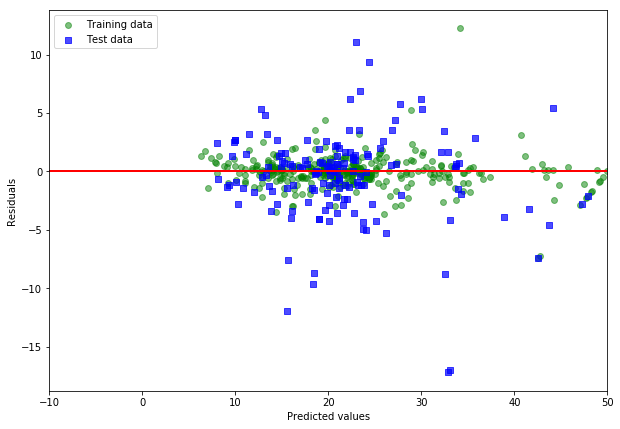

In [1]:
import csv
import numpy as np

with open('./titanic.csv','r') as csvfile:
    titanic_reader = csv.reader(csvfile,delimiter=',',quotechar='"')

    #特徴量の名前が書かれたHeaderを読み取る
    row = next(titanic_reader)
    feature_names = np.array(row)

    #データと正解ラベルを読み取る
    titanic_x, titanic_y = [],[]
    for row in titanic_reader:
        titanic_x.append(row)
        titanic_y.append(row[2]) #正解ラベルは3列目の"survived"

    titanic_x = np.array(titanic_x) #型をリストからnumpy.ndarrayにする
    titanic_y = np.array(titanic_y) #型をリストからnumpy.ndarrayにする

print(feature_names)
print(titanic_x[0],titanic_y[0])


#class(1),age(4),sex(10)を残す
titanic_x = titanic_x[:,[1, 4, 10]]
feature_names = feature_names[[1, 4, 10]]

print(feature_names)
print(titanic_x[12],titanic_y[12])


#年齢の欠損値を平均値で埋める
ages = titanic_x[:,1]
#NA以外のageの平均値を計算する
mean_age = np.mean(titanic_x[ages != 'NA',1].astype(float))
#ageがNAのものを平均値に置き換える
titanic_x[titanic_x[:, 1] == 'NA',1] =mean_age


from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_x[:, 2])
print('Cateorical classes:',label_encoder.classes_)

integer_classes = label_encoder.transform(label_encoder.classes_)
print('Integer classes:',integer_classes)

t = label_encoder.transform(titanic_x[:, 2])
titanic_x[:,2] = t

print(feature_names)
print(titanic_x[12],titanic_y[12])


from sklearn.preprocessing import OneHotEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_x [:, 0])
print("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3, 1)
print("Integer classes:", integer_classes)
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)

#最初に、Label Encoderを使ってpclassを0-2に直す
num_of_rows = titanic_x.shape[0]
t = label_encoder.transform(titanic_x[:, 0]).reshape(num_of_rows, 1)
#次に、OneHotEncoderを使ってデータを1, 0に変換
new_features = one_hot_encoder.transform(t)
#1,0になおしてデータを統合する
titanic_x = np.concatenate([titanic_x, new_features.toarray()], axis = 1)
#OnehotEncoderをする前のpclassのデータを削除する
titanic_x = np.delete(titanic_x, [0], 1)
#特徴量の名前を更新する
feature_names = ['age', 'sex', 'first class', 'second class', 'third class']

# Convert to numerical values
titanic_x = titanic_x.astype (float)
titanic_y = titanic_y.astype (float)

print(feature_names)
print(titanic_x[0],titanic_y[0])

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.25, random_state=0)


from sklearn import metrics
def measure_performance(x,y,clf, show_accuracy=True,show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(x)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")

    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 3, min_samples_leaf = 5)
clf = clf.fit(x_train, y_train)

import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names = ['age','Sex','1st_c1ass','2nd_class','3rd_class'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree.pdf")

#決定木モデルの評価
measure_performance(x_train, y_train, clf)


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30, random_state=0)
clf = clf.fit(x_train, y_train)

#ランダムフォレストモデルの評価
measure_performance(x_train, y_train, clf)


# ======= 回帰 =======
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# データの読み込み
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

# 説明変数及び目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values

# 学習用、検証用データに分割
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 0)

# モデル構築
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )

# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

# 残差プロット
# %matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'green', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'blue', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()

# まとめ
この章ではランダムフォレストを学習しました。
ランダムフォレストとは、アンサンブル学習の一種で複数の決定木を用いて学習します。
分類過程はブラックボックスですが、決定木より高い精度で分類ができると言われています。